In [ ]:
!pip install plotly --upgrade
!pip install pandas-ods-reader
!pip install seaborn

# Dependências

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_ods_reader import read_ods
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
red_path = r'/content/drive/MyDrive/tx_rend_escolas_2021.xlsx'
renda_escolar_dataset = pd.read_excel(red_path, header = 8)

In [ ]:
ebd_path = r'/content/drive/MyDrive/microdados_ed_basica_2021.csv'
educacao_basica_dataset = pd.read_csv(ebd_path, encoding = 'latin-1', sep = ';', dtype = 'unicode')

# Dataframes iniciais

In [ ]:
rendimento_escolar_dataframe = pd.DataFrame(renda_escolar_dataset)

In [ ]:
informacao_escolar_dataframe = pd.DataFrame(educacao_basica_dataset)

# Renomeando colunas

In [ ]:
rendimento_escolar_dataframe = rendimento_escolar_dataframe.rename(columns={
    "CO_ENTIDADE": "Identificador_escola",
    "1_CAT_FUN_AI": "Aprovacao_ensino_fundamental_1",
    "1_CAT_FUN_AF": "Aprovacao_ensino_fundamental_2",
    "2_CAT_FUN_AI": "Reprovacao_ensino_fundamental_1",
    "2_CAT_FUN_AF": "Reprovacao_ensino_fundamental_2",
    "3_CAT_FUN_AI": "Abandono_ensino_fundamental_1",
    "3_CAT_FUN_AF": "Abandono_ensino_fundamental_2"
})

In [ ]:
informacao_escolar_dataframe = informacao_escolar_dataframe.rename(columns={
    "CO_ENTIDADE": "Identificador_escola",
    "IN_AGUA_POTAVEL": "Fornecimento_agua_potavel",
    "IN_ENERGIA_INEXISTENTE": "Fornecimento_energia",
    "IN_ESGOTO_INEXISTENTE": "Acesso_esgotamento_sanitario",
    "IN_TRATAMENTO_LIXO_INEXISTENTE": "Tratamento_lixo",
    "IN_AREA_VERDE": "Area_Verde",
    "IN_BANHEIRO": "Acesso_banheiro",
    "IN_BIBLIOTECA": "Biblioteca",
    "IN_LABORATORIO_CIENCIAS": "Laboratorio_ciencias",
    "IN_LABORATORIO_INFORMATICA": "Laboratorio_informatica",
    "IN_QUADRA_ESPORTES": "Quadra",
    "IN_REFEITORIO": "Refeitorio",
    "IN_SALA_ATENDIMENTO_ESPECIAL": "Sala_atendimento_especial",
    "IN_ACESSIBILIDADE_INEXISTENTE": "Acessibilidade",
    "IN_INTERNET_ALUNOS": "Internet_alunos",
    "IN_ALIMENTACAO": "Alimentação",
    "TP_ATIVIDADE_COMPLEMENTAR": "Atividade_complementar",
    "IN_FINAL_SEMANA": "Final_de_semana",
    "IN_FUND_AI": "ensino_fundamental_1",
    "IN_FUND_AF": "ensino_fundamental_2"
})



```
# This is formatted as code
```

# retira linhas nulas da primeira tabela

In [ ]:
rendimento_escolar_dataframe = rendimento_escolar_dataframe.dropna(axis=0, how='any')

# Filtrando as colunas que serão utilizadas

Mantendo apenas as colunas renomeadas nas tabelas

In [ ]:
rendimento_escolar_dataframe = pd.DataFrame(rendimento_escolar_dataframe, columns = ['Identificador_escola', 'Aprovacao_ensino_fundamental_1', 'Aprovacao_ensino_fundamental_2', 'Reprovacao_ensino_fundamental_1', 'Reprovacao_ensino_fundamental_2', 'Abandono_ensino_fundamental_1', 'Abandono_ensino_fundamental_2'])

In [ ]:
informacao_escolar_dataframe = pd.DataFrame(informacao_escolar_dataframe, columns = ['Identificador_escola', 'Fornecimento_agua_potavel', 'Fornecimento_energia', 'Acesso_esgotamento_sanitario', 'Tratamento_lixo', 'Area_Verde', 'Acesso_banheiro', 'Biblioteca', 'Laboratorio_ciencias', 'Laboratorio_informatica', 'Quadra', 'Refeitorio', 'Sala_atendimento_especial', 'Acessibilidade', 'Internet_alunos', 'Alimentação', 'Atividade_complementar', 'ensino_fundamental_1', 'ensino_fundamental_2'])

In [ ]:
informacao_escolar_dataframe

,Identificador_escola,Fornecimento_agua_potavel,Fornecimento_energia,Acesso_esgotamento_sanitario,Tratamento_lixo,Area_Verde,Acesso_banheiro,Biblioteca,Laboratorio_ciencias,Laboratorio_informatica,Quadra,Refeitorio,Sala_atendimento_especial,Acessibilidade,Internet_alunos,Alimentação,Atividade_complementar,ensino_fundamental_1,ensino_fundamental_2
0,11022558,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,11024275,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0
2,11024291,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
3,11024372,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,1
4,11024666,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221135,53084071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221136,53085000,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0
221137,53086007,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1
221138,53087003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dando merge nas tabelas

Primeiro precisei converter os valores das colunas identificador em ambas as tabelas para inteiros

In [ ]:
rendimento_escolar_dataframe['Identificador_escola']=rendimento_escolar_dataframe['Identificador_escola'].astype(int)
informacao_escolar_dataframe['Identificador_escola']=informacao_escolar_dataframe['Identificador_escola'].astype(int)

Merge em um novo dataframe

In [ ]:
dados_escolares_dataframe = pd.merge(rendimento_escolar_dataframe, informacao_escolar_dataframe, how = 'left', left_on = ['Identificador_escola'], right_on = ['Identificador_escola'])

# Divisão no dataframe

In [ ]:
dados_fundamental_1_df = dados_escolares_dataframe.drop(dados_escolares_dataframe.columns[[2, 4, 6, 24]], axis = 1)

In [ ]:
dados_fundamental_2_df = dados_escolares_dataframe.drop(dados_escolares_dataframe.columns[[1, 3, 5, 23]], axis = 1)

# Filtrando linhas

In [ ]:
dados_fundamental_1_df = dados_fundamental_1_df[dados_fundamental_1_df['ensino_fundamental_1'] != '0']

In [ ]:
dados_fundamental_2_df = dados_fundamental_2_df[dados_fundamental_2_df['ensino_fundamental_2'] != '0']

In [ ]:
print(dados_fundamental_1_df.isna().sum())

In [ ]:
print(dados_fundamental_2_df.isna().sum())

# Gráficos dos dados das escolas

Fornecimento de agua potavel

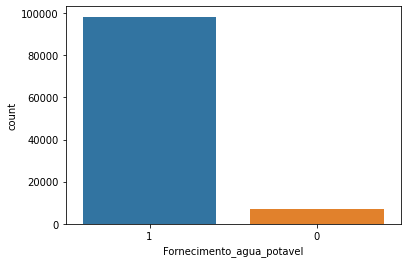

In [ ]:
np.unique(dados_fundamental_1_df['Fornecimento_agua_potavel'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Fornecimento_agua_potavel']);

#Fornecimento de energia do Fundamental 1 e dois

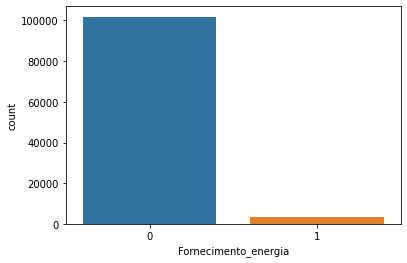

In [ ]:
np.unique(dados_fundamental_1_df['Fornecimento_energia'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Fornecimento_energia']);

In [ ]:
np.unique(dados_fundamental_2_df['Fornecimento_energia'], return_counts = True)
sns.countplot(x = dados_fundamental_2_df['Fornecimento_energia']);

Acesso a esgotamento sanitario

In [ ]:
np.unique(dados_fundamental_1_df['Acesso_esgotamento_sanitario'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acesso_esgotamento_sanitario']);

In [ ]:
np.unique(dados_fundamental_1_df['Acesso_esgotamento_sanitario'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acesso_esgotamento_sanitario']);

Tratamento de lixo

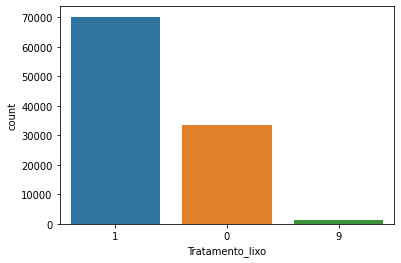

In [ ]:
np.unique(dados_fundamental_1_df['Tratamento_lixo'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Tratamento_lixo']);

In [ ]:
np.unique(dados_fundamental_2_df['Tratamento_lixo'], return_counts = True)
sns.countplot(x = dados_fundamental_2_df['Tratamento_lixo']);

In [ ]:
dados_fundamental_1_df = dados_fundamental_1_df.drop(labels='Tratamento_lixo', axis=1)

Area verde

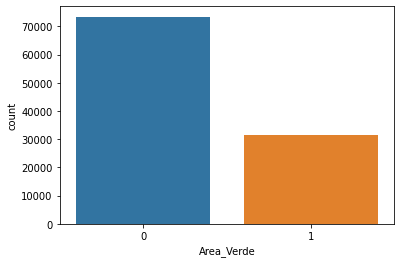

In [ ]:
np.unique(dados_fundamental_1_df['Area_Verde'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Area_Verde']);

In [ ]:
np.unique(dados_fundamental_1_df['Area_Verde'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Area_Verde']);

Acesso banheiro

In [ ]:
np.unique(dados_fundamental_1_df['Acesso_banheiro'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acesso_banheiro']);

In [ ]:
np.unique(dados_fundamental_1_df['Acesso_banheiro'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acesso_banheiro']);

Biblioteca

In [ ]:
np.unique(dados_fundamental_1_df['Biblioteca'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Biblioteca']);

In [ ]:
np.unique(dados_fundamental_1_df['Biblioteca'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Biblioteca']);

Laboratorio de ciencias

In [ ]:
np.unique(dados_fundamental_1_df['Laboratorio_ciencias'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Laboratorio_ciencias']);

In [ ]:
np.unique(dados_fundamental_1_df['Laboratorio_ciencias'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Laboratorio_ciencias']);

Laboratorio de informatica

In [ ]:
np.unique(dados_fundamental_1_df['Laboratorio_informatica'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Laboratorio_informatica']);

In [ ]:
np.unique(dados_fundamental_1_df['Laboratorio_informatica'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Laboratorio_informatica']);

Quadra

In [ ]:
np.unique(dados_fundamental_1_df['Quadra'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Quadra']);

In [ ]:
np.unique(dados_fundamental_1_df['Quadra'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Quadra']);

Refeitorio

In [ ]:
np.unique(dados_fundamental_1_df['Refeitorio'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Refeitorio']);

In [ ]:
np.unique(dados_fundamental_1_df['Refeitorio'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Refeitorio']);

Sala de atendimento especial

In [ ]:
np.unique(dados_fundamental_1_df['Sala_atendimento_especial'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Sala_atendimento_especial']);

In [ ]:
np.unique(dados_fundamental_1_df['Sala_atendimento_especial'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Sala_atendimento_especial']);

Acessibilidade

In [ ]:
np.unique(dados_fundamental_1_df['Acessibilidade'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acessibilidade']);

In [ ]:
np.unique(dados_fundamental_1_df['Acessibilidade'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Acessibilidade']);

Internet alunos

In [ ]:
np.unique(dados_fundamental_1_df['Internet_alunos'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Internet_alunos']);

In [ ]:
np.unique(dados_fundamental_1_df['Internet_alunos'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Internet_alunos']);

Alimentação

In [ ]:
np.unique(dados_fundamental_1_df['Alimentação'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Alimentação']);

In [ ]:
np.unique(dados_fundamental_1_df['Alimentação'], return_counts = True)
sns.countplot(x = dados_fundamental_1_df['Alimentação']);

# Criando 3 novas colunas

Decidi dar duas notas para a escola, uma para serviços essenciais como alimentação e agua potavel e outra para a estrutura da escola, como biblioteca, laboratorios e etc.

Serviços essenciais

In [ ]:
dados_fundamental_1_df['Fornecimento_agua_potavel']=dados_fundamental_1_df['Fornecimento_agua_potavel'].astype(int)
dados_fundamental_1_df['Fornecimento_energia']=dados_fundamental_1_df['Fornecimento_energia'].astype(int)
dados_fundamental_1_df['Acesso_esgotamento_sanitario']=dados_fundamental_1_df['Acesso_esgotamento_sanitario'].astype(int)
dados_fundamental_1_df['Acesso_banheiro']=dados_fundamental_1_df['Acesso_banheiro'].astype(int)
dados_fundamental_1_df['Alimentação']=dados_fundamental_1_df['Alimentação'].astype(int)
dados_fundamental_1_df['Refeitorio']=dados_fundamental_1_df['Refeitorio'].astype(int)
dados_fundamental_1_df['Acessibilidade']=dados_fundamental_1_df['Acessibilidade'].astype(int)
dados_fundamental_1_df['Internet_alunos']=dados_fundamental_1_df['Internet_alunos'].astype(int)

In [ ]:
dados_fundamental_1_df['Nota_servicos_essenciais'] = dados_fundamental_1_df['Fornecimento_agua_potavel'] + dados_fundamental_1_df['Fornecimento_energia'] + dados_fundamental_1_df['Acesso_esgotamento_sanitario'] + dados_fundamental_1_df['Acesso_banheiro'] + dados_fundamental_1_df['Alimentação'] + dados_fundamental_1_df['Refeitorio'] + dados_fundamental_1_df['Acessibilidade'] + dados_fundamental_1_df['Internet_alunos']

In [ ]:
dados_fundamental_1_df['Area_Verde']=dados_fundamental_1_df['Area_Verde'].astype(int)
dados_fundamental_1_df['Biblioteca']=dados_fundamental_1_df['Biblioteca'].astype(int)
dados_fundamental_1_df['Laboratorio_ciencias']=dados_fundamental_1_df['Laboratorio_ciencias'].astype(int)
dados_fundamental_1_df['Laboratorio_informatica']=dados_fundamental_1_df['Laboratorio_informatica'].astype(int)
dados_fundamental_1_df['Quadra']=dados_fundamental_1_df['Quadra'].astype(int)
dados_fundamental_1_df['Atividade_complementar']=dados_fundamental_1_df['Atividade_complementar'].astype(int)
dados_fundamental_1_df['Sala_atendimento_especial']=dados_fundamental_1_df['Sala_atendimento_especial'].astype(int)

In [ ]:
dados_fundamental_1_df['Nota_estrutura_escolar'] = dados_fundamental_1_df['Area_Verde'] + dados_fundamental_1_df['Biblioteca'] + dados_fundamental_1_df['Laboratorio_ciencias'] + dados_fundamental_1_df['Laboratorio_informatica'] + dados_fundamental_1_df['Quadra'] + dados_fundamental_1_df['Atividade_complementar'] + dados_fundamental_1_df['Sala_atendimento_especial']

In [ ]:
dados_fundamental_1_df['Nota_da_escola'] = dados_fundamental_1_df['Nota_servicos_essenciais'] + dados_fundamental_1_df['Nota_estrutura_escolar']

In [ ]:
dados_fundamental_1_df

,Identificador_escola,Aprovacao_ensino_fundamental_1,Reprovacao_ensino_fundamental_1,Abandono_ensino_fundamental_1,Fornecimento_agua_potavel,Fornecimento_energia,Acesso_esgotamento_sanitario,Area_Verde,Acesso_banheiro,Biblioteca,...,Refeitorio,Sala_atendimento_especial,Acessibilidade,Internet_alunos,Alimentação,Atividade_complementar,ensino_fundamental_1,Nota_servicos_essenciais,Nota_estrutura_escolar,Nota_da_escola
0,11022558,100,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,5,0,5
1,11024291,100,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,4,0,4
2,11024372,93.3,6.7,0,1,0,0,0,1,1,...,1,0,1,0,1,0,1,5,2,7
3,11024666,98.5,1.5,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,4,1,5
4,11024682,100,0,0,1,0,0,0,1,1,...,1,1,0,1,1,0,1,5,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130123,53083016,97.1,2.9,0,1,0,0,0,1,1,...,1,0,0,0,0,0,1,3,3,6
130124,53084020,100,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,3,1,4
130125,53084039,100,0,0,1,0,0,1,1,1,...,1,0,0,1,1,0,1,5,5,10
130126,53084055,100,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,3,3,6


Fiz o mesmo com o ensino fundamental 2

In [ ]:
dados_fundamental_2_df['Fornecimento_agua_potavel']=dados_fundamental_2_df['Fornecimento_agua_potavel'].astype(int)
dados_fundamental_2_df['Fornecimento_energia']=dados_fundamental_2_df['Fornecimento_energia'].astype(int)
dados_fundamental_2_df['Acesso_esgotamento_sanitario']=dados_fundamental_2_df['Acesso_esgotamento_sanitario'].astype(int)
dados_fundamental_2_df['Acesso_banheiro']=dados_fundamental_2_df['Acesso_banheiro'].astype(int)
dados_fundamental_2_df['Alimentação']=dados_fundamental_2_df['Alimentação'].astype(int)
dados_fundamental_2_df['Refeitorio']=dados_fundamental_2_df['Refeitorio'].astype(int)
dados_fundamental_2_df['Acessibilidade']=dados_fundamental_2_df['Acessibilidade'].astype(int)
dados_fundamental_2_df['Internet_alunos']=dados_fundamental_2_df['Internet_alunos'].astype(int)

In [ ]:
dados_fundamental_2_df['Nota_servicos_essenciais'] = dados_fundamental_2_df['Fornecimento_agua_potavel'] + dados_fundamental_2_df['Fornecimento_energia'] + dados_fundamental_2_df['Acesso_esgotamento_sanitario'] + dados_fundamental_2_df['Acesso_banheiro'] + dados_fundamental_2_df['Alimentação'] + dados_fundamental_2_df['Refeitorio'] + dados_fundamental_2_df['Acessibilidade'] + dados_fundamental_2_df['Internet_alunos']

In [ ]:
dados_fundamental_2_df['Area_Verde']=dados_fundamental_2_df['Area_Verde'].astype(int)
dados_fundamental_2_df['Biblioteca']=dados_fundamental_2_df['Biblioteca'].astype(int)
dados_fundamental_2_df['Laboratorio_ciencias']=dados_fundamental_2_df['Laboratorio_ciencias'].astype(int)
dados_fundamental_2_df['Laboratorio_informatica']=dados_fundamental_2_df['Laboratorio_informatica'].astype(int)
dados_fundamental_2_df['Quadra']=dados_fundamental_2_df['Quadra'].astype(int)
dados_fundamental_2_df['Atividade_complementar']=dados_fundamental_2_df['Atividade_complementar'].astype(int)
dados_fundamental_2_df['Sala_atendimento_especial']=dados_fundamental_2_df['Sala_atendimento_especial'].astype(int)

In [ ]:
dados_fundamental_2_df['Nota_estrutura_escolar'] = dados_fundamental_2_df['Area_Verde'] + dados_fundamental_2_df['Biblioteca'] + dados_fundamental_2_df['Laboratorio_ciencias'] + dados_fundamental_2_df['Laboratorio_informatica'] + dados_fundamental_2_df['Quadra'] + dados_fundamental_2_df['Atividade_complementar'] + dados_fundamental_2_df['Sala_atendimento_especial']

In [ ]:
dados_fundamental_2_df['Nota_da_escola'] = dados_fundamental_2_df['Nota_servicos_essenciais'] + dados_fundamental_2_df['Nota_estrutura_escolar']

In [ ]:
dados_fundamental_2_df

# Tratamento dos valores faltantes

In [ ]:
contagem = dados_fundamental_1_df['Aprovacao_ensino_fundamental_1'].value_counts()

In [ ]:
contagem

100     59718
--       1625
99.5     1042
99.6     1016
99.2      981
        ...  
51.1        1
66.6        1
74.8        1
23.5        1
41          1
Name: Aprovacao_ensino_fundamental_1, Length: 536, dtype: int64

In [ ]:
dados_fundamental_1_df.loc[dados_fundamental_1_df['Aprovacao_ensino_fundamental_1'] == '--', 'Aprovacao_ensino_fundamental_1'] = None

In [ ]:
dados_fundamental_1_df.dropna(subset=['Aprovacao_ensino_fundamental_1'], inplace=True)

Depois, fiz a contagem dos valores que estavam faltando na tabela do ensino fundamental 2

In [ ]:
contagem = dados_fundamental_2_df['Aprovacao_ensino_fundamental_2'].value_counts()

In [ ]:
contagem

100     23534
99.1      732
99.6      727
99.4      722
--        702
        ...  
22.4        1
39.6        1
46.5        1
9.1         1
48.4        1
Name: Aprovacao_ensino_fundamental_2, Length: 608, dtype: int64

Novamente 702 linhas é um número pequeno em relação as 61531 linhas que tenho na tabela, por isso resolvi remove-las

In [ ]:
dados_fundamental_2_df.loc[dados_fundamental_2_df['Aprovacao_ensino_fundamental_2'] == '--', 'Aprovacao_ensino_fundamental_2'] = None

In [ ]:
dados_fundamental_2_df.dropna(subset=['Aprovacao_ensino_fundamental_2'], inplace=True)

# Escalonamento das notas

Aqui, escalonei as notas de 0 a 10

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 10))

In [ ]:
dados_fundamental_1_df[["Nota_servicos_essenciais", "Nota_estrutura_escolar", "Nota_da_escola"]] = scaler.fit_transform(dados_fundamental_1_df[["Nota_servicos_essenciais", "Nota_estrutura_escolar", "Nota_da_escola"]])

In [ ]:
dados_fundamental_1_df

,Identificador_escola,Aprovacao_ensino_fundamental_1,Reprovacao_ensino_fundamental_1,Abandono_ensino_fundamental_1,Fornecimento_agua_potavel,Fornecimento_energia,Acesso_esgotamento_sanitario,Area_Verde,Acesso_banheiro,Biblioteca,...,Refeitorio,Sala_atendimento_especial,Acessibilidade,Internet_alunos,Alimentação,Atividade_complementar,ensino_fundamental_1,Nota_servicos_essenciais,Nota_estrutura_escolar,Nota_da_escola
0,11022558,100,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,6.666667,0.000000,3.333333
1,11024291,100,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,5.000000,0.000000,2.500000
2,11024372,93.3,6.7,0,1,0,0,0,1,1,...,1,0,1,0,1,0,1,6.666667,2.857143,5.000000
3,11024666,98.5,1.5,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,5.000000,1.428571,3.333333
4,11024682,100,0,0,1,0,0,0,1,1,...,1,1,0,1,1,0,1,6.666667,5.714286,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130123,53083016,97.1,2.9,0,1,0,0,0,1,1,...,1,0,0,0,0,0,1,3.333333,4.285714,4.166667
130124,53084020,100,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,3.333333,1.428571,2.500000
130125,53084039,100,0,0,1,0,0,1,1,1,...,1,0,0,1,1,0,1,6.666667,7.142857,7.500000
130126,53084055,100,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,3.333333,4.285714,4.166667


In [ ]:
dados_fundamental_2_df[["Nota_servicos_essenciais", "Nota_estrutura_escolar", "Nota_da_escola"]] = scaler.fit_transform(dados_fundamental_2_df[["Nota_servicos_essenciais", "Nota_estrutura_escolar", "Nota_da_escola"]])

In [ ]:
dados_fundamental_2_df

,Identificador_escola,Aprovacao_ensino_fundamental_2,Reprovacao_ensino_fundamental_2,Abandono_ensino_fundamental_2,Fornecimento_agua_potavel,Fornecimento_energia,Acesso_esgotamento_sanitario,Area_Verde,Acesso_banheiro,Biblioteca,...,Refeitorio,Sala_atendimento_especial,Acessibilidade,Internet_alunos,Alimentação,Atividade_complementar,ensino_fundamental_2,Nota_servicos_essenciais,Nota_estrutura_escolar,Nota_da_escola
2,11024372,91.3,8.7,0,1,0,0,0,1,1,...,1,0,1,0,1,0,1,6.666667,2.857143,5.000000
3,11024666,100,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,5.000000,1.428571,3.333333
4,11024682,100,0,0,1,0,0,0,1,1,...,1,1,0,1,1,0,1,6.666667,5.714286,6.666667
5,11024828,98.7,1.3,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,3.333333,1.428571,2.500000
6,11024917,97.1,2.9,0,1,0,0,0,1,1,...,0,0,1,0,1,0,1,5.000000,2.857143,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130118,53068211,93.6,6.4,0,1,0,0,0,1,0,...,0,1,0,0,1,1,1,3.333333,4.285714,4.166667
130122,53082001,100,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,1,3.333333,7.142857,5.833333
130125,53084039,99.1,0.9,0,1,0,0,1,1,1,...,1,0,0,1,1,0,1,6.666667,7.142857,7.500000
130126,53084055,100,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,3.333333,4.285714,4.166667


# Implementando as Regressões

Preciso prever taxas de aprovação, reprovação e abandono escolar, essas taxas vão de 0 a 100, ou seja do 0 ao 100%, por isso são variaveis quantitativas continuas pois podem assumir qualquer valor dentro deste intervalo.
Ja a variavel previsora, é uma qualitativa nominal, pois classificam de forma binaria o dado.
Para prever uma variavel quantitativa continua a partir de uma variavel qualitativa nominal, usamos modelos de regressão.

# Regressão linear multipla

# Aprovação

Primeiro realizei a regressão linear multipla, para prever usando os dados que formam as notas que criei para a escola

Previsores e classes

Indice de aprovação

In [ ]:
x_aprov_ens_fund_1 = dados_fundamental_1_df.iloc[:, 4:19].values

In [ ]:
y_aprov_ens_fund_1 = dados_fundamental_1_df.iloc[:, 1].values

Treinamento e teste

In [ ]:
x_aprov_ens_fund_1_treinamento, x_aprov_ens_fund_1_teste, y_aprov_ens_fund_1_treinamento, y_aprov_ens_fund_1_teste = train_test_split(x_aprov_ens_fund_1, y_aprov_ens_fund_1, test_size = 0.3, random_state = 0)

Regressor e teste do modelo

In [ ]:
regressor_multiplo = LinearRegression()

In [ ]:
regressor_multiplo.fit(x_aprov_ens_fund_1_treinamento, y_aprov_ens_fund_1_treinamento)

LinearRegression()

B0

In [ ]:
regressor_multiplo.intercept_

95.74656339365595

B1

In [ ]:
regressor_multiplo.coef_

array([ 0.71659385, -3.23944437, -1.35661804, -0.1583416 ,  1.33400883,
        0.10701855,  0.23645263,  0.28603628,  0.68219868,  0.38142578,
       -0.42762602, -0.2866546 ,  0.49219166, -1.32230655,  0.75041049])

Score treinamento

In [ ]:
regressor_multiplo.score(x_aprov_ens_fund_1_treinamento, y_aprov_ens_fund_1_treinamento)

0.04835374180602714

Score teste

In [ ]:
regressor_multiplo.score(x_aprov_ens_fund_1_teste, y_aprov_ens_fund_1_teste)

0.05118968176858685

Previsões

In [ ]:
previsoes = regressor_multiplo.predict(x_aprov_ens_fund_1_teste)

In [ ]:
previsoes

Valor real

In [ ]:
y_aprov_ens_fund_1_teste

array([100, 95.7, 100, ..., 88.9, 100, 100], dtype=object)

Margem de erro

In [ ]:
mean_absolute_error(y_aprov_ens_fund_1_teste, previsoes)

# Abandono

In [ ]:
x_aban_ens_fund_1 = dados_fundamental_1_df.iloc[:, 4:19].values

In [ ]:
y_aban_ens_fund_1 = dados_fundamental_1_df.iloc[:, 3].values

In [ ]:
x_aban_ens_fund_1_treinamento, x_aban_ens_fund_1_teste, y_aban_ens_fund_1_treinamento, y_aban_ens_fund_1_teste = train_test_split(x_aban_ens_fund_1, y_aban_ens_fund_1, test_size = 0.3, random_state = 0)

In [ ]:
regressor_multiplo = LinearRegression()

In [ ]:
regressor_multiplo.fit(x_aban_ens_fund_1_treinamento, y_aban_ens_fund_1_treinamento)

LinearRegression()

In [ ]:
regressor_multiplo.intercept_

1.2061676940348809

In [ ]:
regressor_multiplo.coef_

array([-0.17084966,  2.03598485,  0.83738514,  0.07039118, -0.35505039,
        0.06603256,  0.00416008, -0.05234102, -0.28348244, -0.15081217,
        0.14523604,  0.21819928, -0.25589345,  0.31821252, -0.20052752])

In [ ]:
regressor_multiplo.score(x_aban_ens_fund_1_treinamento, y_aban_ens_fund_1_treinamento)

0.03680342779177326

In [ ]:
regressor_multiplo.score(x_aban_ens_fund_1_teste, y_aban_ens_fund_1_teste)

0.03372202898943766

In [ ]:
previsoes = regressor_multiplo.predict(x_aban_ens_fund_1_teste)

In [ ]:
previsoes

array([1.21667945, 1.21667945, 0.99848016, ..., 2.40911498, 1.06586728,
       1.22479486])

In [ ]:
y_aprov_ens_fund_1_teste

array([100, 95.7, 100, ..., 88.9, 100, 100], dtype=object)

In [ ]:
mean_absolute_error(y_aban_ens_fund_1_teste, previsoes)

1.5524449941592635

# Linear simples com a nota

Previsor e Classe

In [ ]:
x_aprov_ens_fund_1_nota = dados_fundamental_1_df.iloc[:, 22].values

In [ ]:
y_aprov_ens_fund_1_nota = dados_fundamental_1_df.iloc[:, 1].values

Treino e teste

In [ ]:
x_aprov_ens_fund_1_nota_treinamento, x_aprov_ens_fund_1_nota_teste, y_aprov_ens_fund_1_treinamento, y_aprov_ens_fund_1_teste = train_test_split(x_aprov_ens_fund_1_nota, y_aprov_ens_fund_1_nota, test_size = 0.3, random_state = 0)

In [ ]:
regressor_simples = LinearRegression()

In [ ]:
regressor_simples.fit(x_aprov_ens_fund_1_nota_treinamento.reshape(-1, 1), y_aprov_ens_fund_1_treinamento)

LinearRegression()

In [ ]:
regressor_simples.intercept_

95.37608214538197

In [ ]:
regressor_simples.score(x_aprov_ens_fund_1_nota_treinamento.reshape(-1, 1), y_aprov_ens_fund_1_treinamento)

0.00931270319734434

In [ ]:
regressor_simples.score(x_aprov_ens_fund_1_nota_teste.reshape(-1, 1), y_aprov_ens_fund_1_teste)

0.009525018698777865

In [ ]:
previsoes = regressor_simples.predict(x_aprov_ens_fund_1_nota_treinamento.reshape(-1, 1))

In [ ]:
previsoes

array([96.7186647 , 96.38301906, 95.71172778, ..., 97.38995598,
       96.38301906, 97.05431034])

In [ ]:
grafico1 = px.scatter(x = x_aprov_ens_fund_1_nota_treinamento, y = y_aprov_ens_fund_1_treinamento)

In [ ]:
grafico2 = px.line(x = x_aprov_ens_fund_1_nota_treinamento, y = previsoes)

In [ ]:
grafico2.data[0].line.color = 'red'

In [ ]:
grafico3 = go.Figure(data = grafico1.data + grafico2.data)

In [ ]:
grafico3

In [ ]:
previsoes_teste = regressor_simples.predict(x_aprov_ens_fund_1_nota_teste.reshape(-1, 1))

In [ ]:
previsoes_teste

array([96.38301906, 96.38301906, 96.04737342, ..., 96.38301906,
       96.7186647 , 97.72560162])

In [ ]:
y_aprov_ens_fund_1_teste

array([100, 95.7, 100, ..., 88.9, 100, 100], dtype=object)

In [ ]:
mean_absolute_error(y_aprov_ens_fund_1_teste, previsoes_teste)

4.103304110295502

In [ ]:
grafico1 = px.scatter(x = x_aprov_ens_fund_1_nota_teste, y = y_aprov_ens_fund_1_teste)

In [ ]:
grafico2 = px.line(x = x_aprov_ens_fund_1_nota_teste, y = previsoes_teste)

In [ ]:
grafico2.data[0].line.color = 'red'

In [ ]:
grafico3 = go.Figure(data = grafico1.data + grafico2.data)

In [ ]:
grafico3.show()

# Regressão com arvore de decisão

In [ ]:
x_aprov_ens_fund_1_nota

array([3.33333333, 2.5       , 5.        , ..., 7.5       , 4.16666667,
       5.        ])

In [ ]:
y_aprov_ens_fund_1_nota

array([100, 100, 93.3, ..., 100, 100, 100], dtype=object)

In [ ]:
regressor_arvore = DecisionTreeRegressor()

In [ ]:
regressor_arvore.fit(x_aprov_ens_fund_1_nota.reshape(-1, 1), y_aprov_ens_fund_1_nota)

DecisionTreeRegressor()

In [ ]:
previsoes = regressor_arvore.predict(x_aprov_ens_fund_1_nota.reshape(-1, 1))

In [ ]:
regressor_arvore.score(x_aprov_ens_fund_1_nota.reshape(-1, 1), y_aprov_ens_fund_1_nota)

0.01077727080345292

In [ ]:
grafico = px.scatter(x = x_aprov_ens_fund_1_nota, y = y_aprov_ens_fund_1_nota)

In [ ]:
grafico.add_scatter(x = x_aprov_ens_fund_1_nota, y = previsoes, name = 'Regressão')

In [ ]:
x_teste_arvore = np.arange(min(x_aprov_ens_fund_1_nota), max(x_aprov_ens_fund_1_nota), 0.1)

In [ ]:
x_teste_arvore

In [ ]:
grafico = px.scatter(x = x_aprov_ens_fund_1_nota, y = y_aprov_ens_fund_1_nota)

In [ ]:
grafico.add_scatter(x = x_teste_arvore.reshape(-1, 1), y = regressor_arvore.predict(x_teste_arvore.reshape(-1, 1)), name = 'Regressão')

In [ ]:
grafico.show()

In [ ]:
regressor_arvore.predict([[6]])

array([98.07807749])

# Regressão com redes neurais

In [ ]:
scaler_x = StandardScaler()

In [ ]:
x_aprov_ens_fund_scaled = scaler_x.fit_transform(x_aprov_ens_fund_1_nota.reshape(-1, 1))

In [ ]:
scaler_y = StandardScaler()

In [ ]:
y_aprov_ens_fund_scaled = scaler_y.fit_transform(y_aprov_ens_fund_1_nota.reshape(-1, 1))

In [ ]:
regressor_aprov_ens_fund = MLPRegressor(max_iter = 1000)

In [ ]:
regressor_aprov_ens_fund.fit(x_aprov_ens_fund_scaled, y_aprov_ens_fund_scaled.ravel())

MLPRegressor(max_iter=1000)

In [ ]:
regressor_aprov_ens_fund.score(x_aprov_ens_fund_scaled, y_aprov_ens_fund_scaled)

0.01070608350880331

In [ ]:
prever = [[84]]
prever = scaler_x.transform(prever)
prever

array([[45.73970046]])